# Introduction to Numerical Differentiation and Integration

Today we will go over some basic calculus using Python. I like to say that calculus is the mathematics of change, while physics is the science of things changing, so they go together quite well! The foundation of much of modern physics in Newton's Laws of Motion, which can be sumarized by his famous formula;

$$F = ma = m \frac{d^2x}{dt^2}.$$

And much of computational physics requires solving this equation in various directions; either integrating force to solve for position, or differetiating position changes to find force. 

## Numerical Accuracy and Differentiation

Before we dive into calculating derivatives, it is useful to study numerical accuracy. If we act to brashy with our calculations we might start to run into the limits of our computers precision, thereby introducing new errors into our calculation. To take a simple example, lets look at numerical differentiation:

$f'(x) = \frac{f(x+h)-f(x)}{h}$

and study what happens when we make h very small. For our example function lets use the following;

$f(x) = -\sin(x)\exp{(-x)}$

and look at the derivative at $x= \pi/3$. [Wolfram Alpha](https://www.wolframalpha.com/input/?i=derivative+of+sin(x)%2Fexp(x)+at+x%3D+pi%2F3) tells me this derivative is analytically equal to 

$f'(\pi/3) = -(1/2 - \sqrt{3}/2) e^{-\pi/3} \approx -0.12844556411843522596848807811180271548188465688642038774$

In [1]:
sol = 0.12844556411843522596848807811180271548188465688642038774

In [2]:
sol

0.12844556411843522

Note immediately that python drops digits after the first 16... This is the limitation of machine precision! Look at the following "equality"

In [3]:
1.0 == 0.99999999999999999


True

It isn't actually true mathematically, but does seem true according to a computer... The computer cannot store the 17th digit, so it rounds it up which makes the RHS equal to 1.0. For typical applications, 16 significant digits is plenty of precision to perform a calculation to high accuracy/precision.

Lets now see what happens when we try to do calculus with these small numbers.

In [4]:
def derivative(f,x,h=1):
    return (f(x+h)-f(x))/h

import numpy as np

def func(x):
    return -np.sin(x)/np.exp(x)

In [5]:
h = np.logspace(-16,1,100) #initalizing a list of possible h values
derivatives = derivative(func,np.pi/3,h)

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


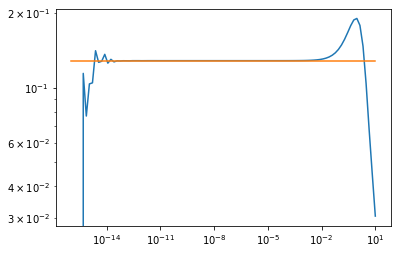

In [7]:
plt.loglog(h,derivatives)
plt.loglog([10**-16,10],[sol,sol])

Notice that even before we hit the "limit" of $10^{16}$ our accuracy decreases (we no longer meet the orange line). It is important to keep in mind that we cannot make finite differences arbitrarily small, even though mathematically we should be taking them to zero.

## Using Numpy

Numpy has a built in function, gradient, which can help plot derivatives of functions (or higher order versions). Lets see how we would use this.

In [8]:
x = np.linspace(0,10,101)*np.pi/6
fx = func(x)

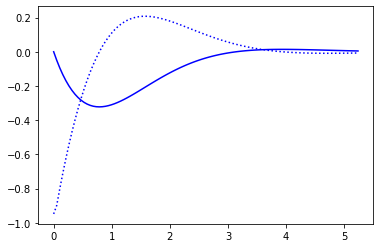

In [9]:
plt.plot(x,fx,"b")
plt.plot(x,np.gradient(fx,x),"b:") 

In [10]:
x[20], np.pi/3

(1.0471975511965976, 1.0471975511965976)

In [11]:
np.gradient(fx,x)[20], sol #fairly close!

(0.12800746282602793, 0.12844556411843522)

Numpy gets fairly close! It uses a slightly more complex interpolation scheme using second derivative information.

## Numerical Integration

Integrating thing is fairly hard... but we can use numpy to make things easier! Lets use our function from above. [Wolfram tells me](https://www.wolframalpha.com/input/?i=integral+of+-sin(x)%2Fexp(x)+from+0+to+1) that

$$\int_0^1 f(x) = (-e + \cos(1) + \sin(1))/(2 e) \approx -0.24583700700023743046364199187064293501796014980384481619$$

Normally, the first thing taught in calculus class is the rectangle rule. We can code this up quickly using Numpy!

In [12]:
def integral(func,x_0 = 0, x_1=1,N=100):
    x = np.linspace(x_0,x_1,N) #grid of x values
    dx = x[1]-x[0] #difference between x values


    integral = np.sum(func(x))*dx
    return integral

In [13]:
N_vals = [3,10,20,30,40,50,100,1000,10000,1000000,10**8] #possible N values 

integral_vals = [-integral(func,N = i) for i in N_vals] #this is known in python terms as a "list comprehension"

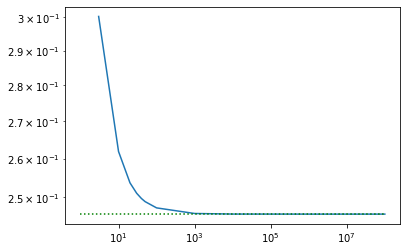

In [17]:
plt.loglog(N_vals,integral_vals)
plt.loglog([1,10**8],[0.2458370070002,0.2458370070002], "g:") #Trueth

If you try to extend beyond $10^8$ steps your computer will have a hard time keeping everything in memory!

## Introduction to Optimization

Lets say we want to find the minimum value of the our function. For today we will mostly be looking at "convex optimization" where there is only one true minima.

### Method 1: "Brute Force" (i.e. grid search)

We can initialize a large numpy array, evaluate the function at all points, and find the minimum value.

In [66]:
x = np.linspace(0,5,1000)
fx = func(x)


In [22]:
np.argmin(fx) #finding which index is the minimal value

157

In [23]:
x[157]

0.7857857857857857

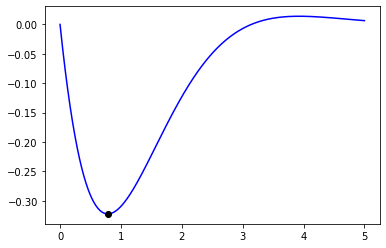

In [42]:
plt.plot(x,fx,"b")
plt.plot(x[157],fx[157],"o",color="black")

### Method 2: Gradient Descent

Here we will the property that if $f'(x) = 0$ we are at an extrema of the function, and the direction/sign of $f'(x)$ would give us the direction to move. This is sometimes known as "rolling down a hill".

In [36]:
x_0 = 2.5 #our starting value
fx_0 = func(x_0)
fp_0 = derivative(func,x_0,h=0.001)

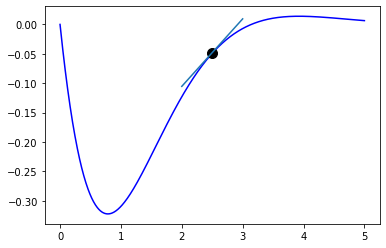

In [55]:
plt.plot(x,fx,"b")
plt.plot(x_0,fx_0,"o",color="black",markersize=10)
plt.plot([x_0-0.5,x_0+0.5], fp_0*np.array([x_0-0.5,x_0+0.5])-0.335)

In [59]:
# One step gradient descent!
x_1 = x_0 - fp_0
fx_1= func(x_1)
fp_1 = derivative(func,x_1,h=0.001)

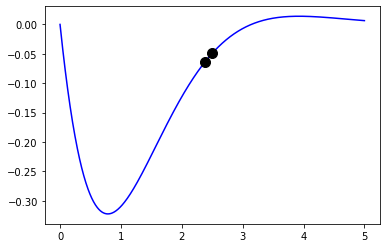

In [60]:
plt.plot(x,fx,"b")
plt.plot(x_0,fx_0,"o",color="black",markersize=10)
plt.plot(x_1,fx_1,"o",color="black",markersize=10)

0.13008861377164505 -0.06319105800385064
0.14747666394109016 -0.08125564795785827
0.16652121148107157 -0.10443373736072838
0.18571400590566833 -0.1338175781989006
0.2015966882314424 -0.16990588981084348
0.20782223198825833 -0.2114163470452383
0.1957654134552289 -0.25373859523037845
0.15985163543413838 -0.28898372860002713
0.10711026360388232 -0.31061124614806856
0.057374095263684755 -0.3195075019703691
0.025343280908141086 -0.32188328331133226
0.009912647287613208 -0.3223240156009432
0.0036565192982340733 -0.3223882432224167
0.0013170525617334228 -0.3223961713118025
0.0004701813248186859 -0.32239692492050165


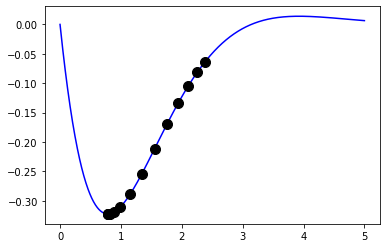

In [71]:
# Basic Gradient Descent Loop

# PLOT FUNCTION (for comparison)
x_list = np.linspace(0,5,1000)
fx_list = func(x_list)

plt.plot(x_list,fx_list,"b")

#INITIALIZING STARTING VALUES
x_L = 2.5 #our starting value
fx_L = func(x_0)
fp_L = derivative(func,x_0,h=0.001)
fp = fp_L


while abs(fp)>0.001: #LOOP TILL "CONVERGENCE CRITERIA" MET
    x = x_L - fp_L
    fx= func(x)
    fp = derivative(func,x,h=0.001)
    print(fp,fx)
    fp_L = fp
    x_L = x
    
    plt.plot(x,fx,"o",color="black",markersize=10)

## Method 3: Second order methods : Newton's Method

In abstract we could use second derivative information to better inform how much we should move in each direction; i.e. if the surface is curving down we should make a larger step than if it is curving up. The classic example of this is Newton's Method. We will implement Newton's Method (and a specialized form, BFGS) in Problem Set 3. 

## Method 4: Monte Carlo Methods

We will talk more about Monte Carlo methods next lesson/next week. These methods are useful for the non-convex case where there might be multiple minima.